Import libraries

In [1]:
suppressMessages(library('ggplot2'))
suppressMessages(library('dplyr'))
suppressMessages(library('repr'))
suppressMessages(library('GoFKernel'))
suppressMessages(library('tidyverse'))
suppressMessages(library('lubridate'))
suppressMessages(library('viridis'))
suppressMessages(library('gridExtra'))

library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(GoFKernel)
library(gridExtra)
library(tibble)

library(tidyr)
library(ggplot2)
library(viridis)

# Exercise 1

Community Mobility Reports have been created with the aim to provide insights into
what has changed in response to policies aimed at combating COVID-19. Data can be found at https://www.google.com/covid19/mobility/

Download and analyze the following data sets: https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv
and https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip

The data show how visitors to (or time spent in) categorized places change compared to baseline days. A baseline day represents a normal value for that day of the week. The baseline day is the median value from the 5-week period Jan 3 – Feb 6, 2020.

To make the reports useful, categories have been used to group some of the places with similar characteristics for purposes of social distancing guidance. The following categories are available:
- retail and recreation, i.e. places like restaurants,cafes, shopping centers, theme parks,museums, libraries, and movie theaters
- grocery and pharmacy, i.e. grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies
- parks, i.e. national parks, public beaches, marinas, dog parks, plazas,and public gardens
- transit stations i.e. all public transport hubs such as subway, bus, and train stations
- workplaces, i.e. places of work
- residential, i.e. people’s residence

Select a couple of European countries of your choice and analyze the trends in the previous variables over time:
produce a plot of the data by averaging the observable over a period of one week (hint: convert the data field to lubridate::week) and one month and quantify the impact of COVID-19 restrictions on mobility sitations.

In [2]:
data <- read_csv('DATA/Global_Mobility_Report.csv')

Rows: 9744676 Columns: 15── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): country_region_code, country_region, sub_region_1, sub_region_2, m...
dbl  (6): retail_and_recreation_percent_change_from_baseline, grocery_and_ph...
date (1): date
ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

In [3]:
elaborate_plot_data <- function(name1, name2, date_type = 'week', year = '2021'){
    
    country1 <- filter(data, country_region == name1)
    country2 <- filter(data, country_region == name2)
    year_mask_1 <- as.numeric(format(country1$date, format = '%Y')) == year
    year_mask_2 <- as.numeric(format(country2$date, format = '%Y')) == year
    country1 <- country1[year_mask_1,]
    country2 <- country2[year_mask_2,]
    
    
    plot_week <- function(i){
    
    ggplot() +
    geom_line(aes(x = week, y = week_country1[,i], color = name1)) + 
    geom_line(aes(x = week, y = week_country2[,i], color = name2)) +
    labs(colour = 'legend', title = (str_remove(colnames(week_country1)[i], '_percent_change_from_baseline')),  x='week', y='') + 
    theme(text = element_text(size=9)) +
    theme_bw() +
    scale_colour_manual(values=c('darkolivegreen2', 'darksalmon'))
        
    }
    
    plot_month <- function(i){
    
    ggplot() +
    geom_line(aes(x = month, y = month_country1[,i], color = name1)) + 
    geom_line(aes(x = month, y = month_country2[,i], color = name2)) +
    labs(colour = 'legend', title = (str_remove(colnames(month_country1)[i], '_percent_change_from_baseline')),  x='month', y='') + 
    theme(text = element_text(size=9)) +
    theme_bw() +
    scale_colour_manual(values=c('darkolivegreen2', 'darksalmon'))
        
    }
    
    if (date_type == 'week'){
        week_country1 <- aggregate(country1[, 10:15], list(week(country1$date)), mean, na.rm=TRUE)
        week_country2 <- aggregate(country2[, 10:15], list(week(country2$date)), mean, na.rm=TRUE)
        week <- week_country1[, 1]
        
        options(repr.plot.width = 12, repr.plot.height = 8)
        par(mfrow = c(2,2))
        plt <- lapply(2:7, plot_week)
        do.call(grid.arrange, c(plt, list(top = 'Weekly statistics')))
    
    }
    else{
        
        if(date_type == 'month'){
            month_country1 <- aggregate(country1[, 10:15], list(month(country1$date)), mean, na.rm=TRUE)
            month_country2 <- aggregate(country2[, 10:15], list(month(country2$date)), mean, na.rm=TRUE)
            month <- month_country1[, 1]
            
            options(repr.plot.width = 12, repr.plot.height = 8)
            par(mfrow = c(2,2))
            plt <- lapply(2:7, plot_month)
            do.call(grid.arrange, c(plt, list(top = 'Monthly statistics')))
            
        }
        
        else{
            
            paste('no date type selected')
            
        }
    }  
}

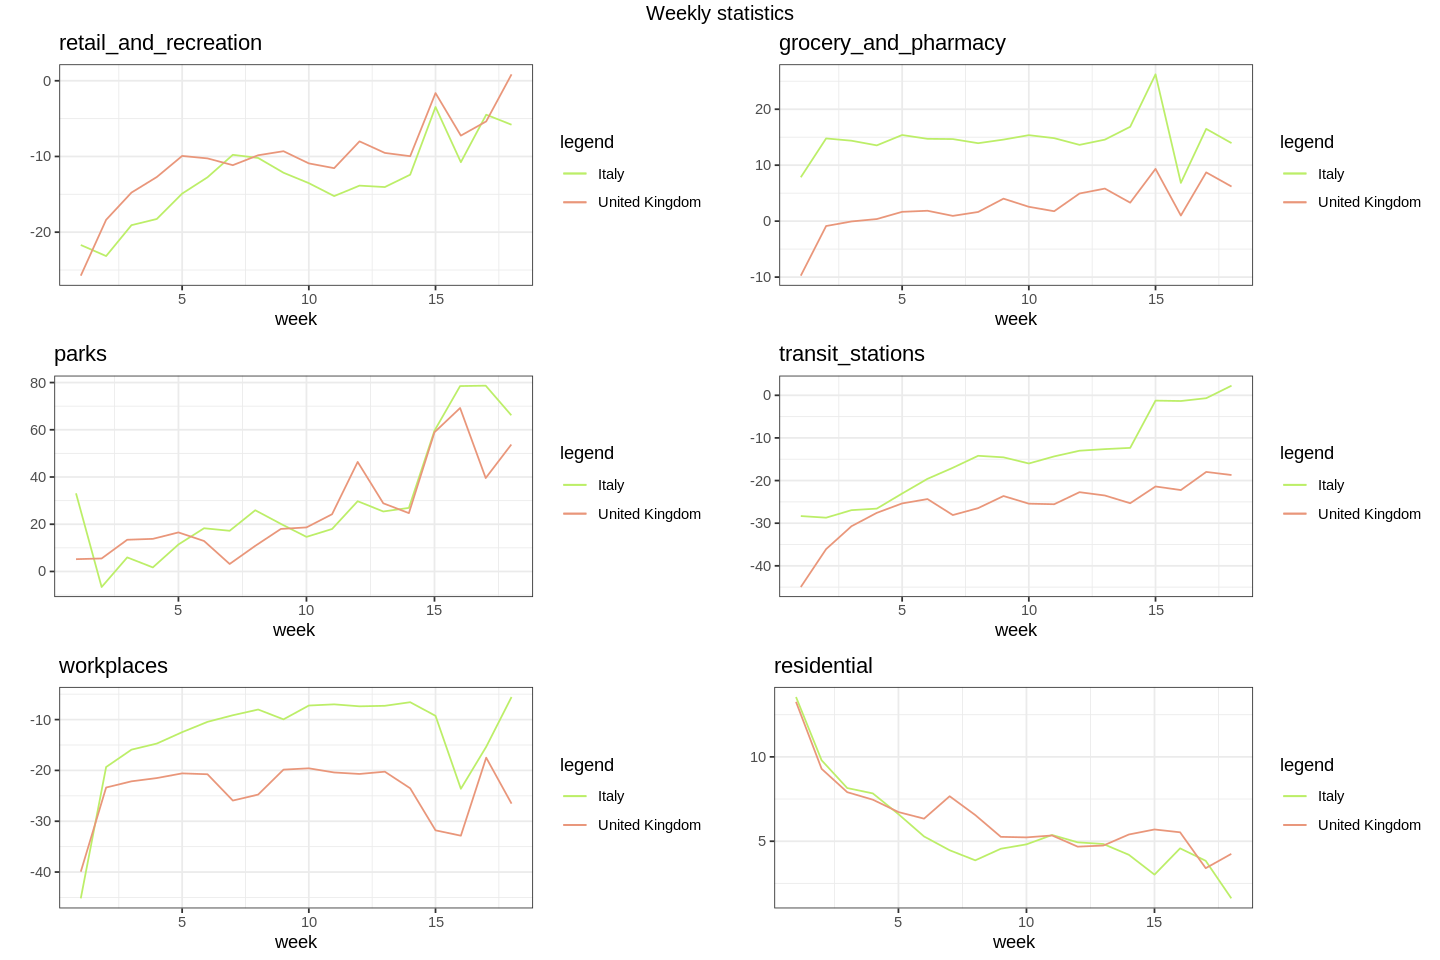

In [4]:
elaborate_plot_data('Italy', 'United Kingdom', date_type = 'week', year = '2022')

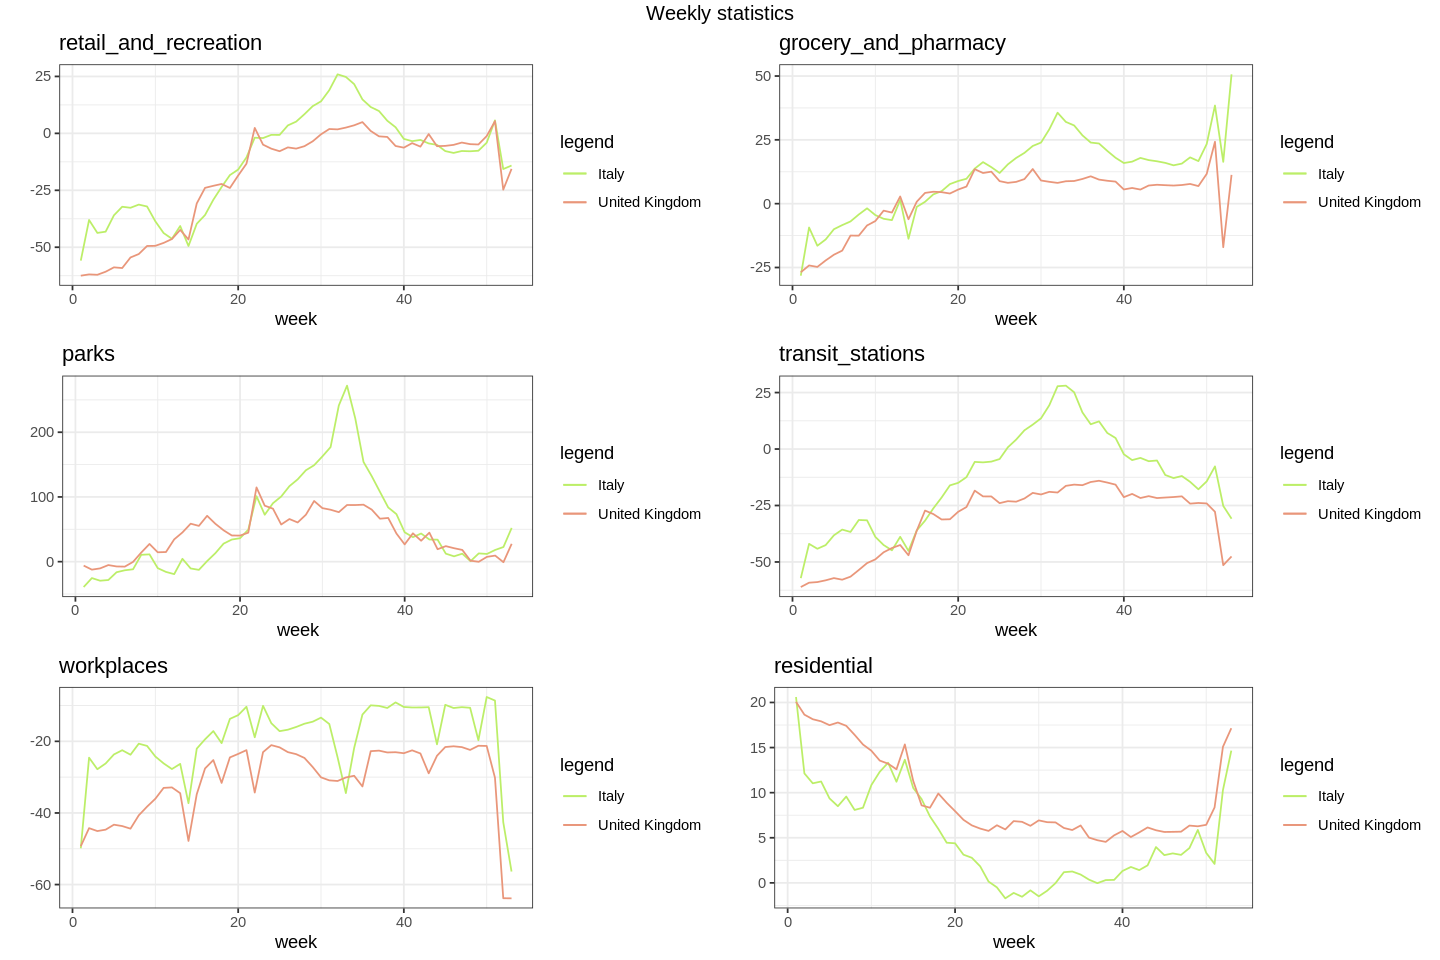

In [5]:
elaborate_plot_data('Italy', 'United Kingdom', date_type = 'week', year = '2021')

In [6]:
regions_data <- read_csv('DATA/Region_Mobility_Report_CSVs/2022_IT_Region_Mobility_Report.csv')

Rows: 15621 Columns: 15── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): country_region_code, country_region, sub_region_1, sub_region_2, i...
dbl  (6): retail_and_recreation_percent_change_from_baseline, grocery_and_ph...
lgl  (2): metro_area, census_fips_code
date (1): date
ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

In [7]:
Regions <- c('Abruzzo', 'Apulia', 'Aosta', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna', 'Friuli-Venezia Giulia', 'Lazio', 'Liguria', 'Lombardy', 'Marche', 
             'Molise', 'Piedmont', 'Sardinia', 'Sicily', 'Trentino-South Tirol', 'Tuscany', 'Umbria', 'Veneto')

In [8]:
elaborate_plot_reg <- function(name1, name2, name3, date_type = 'week'){
    
    reg1 <- filter(regions_data, sub_region_1 == name1)
    reg2 <- filter(regions_data, sub_region_1 == name2)
    reg3 <- filter(regions_data, sub_region_1 == name3)
    
    plot_week <- function(i){
    
    ggplot() +
    geom_line(aes(x = week, y = week_reg1[,i], color = name1)) + 
    geom_line(aes(x = week, y = week_reg2[,i], color = name2)) +
    geom_line(aes(x = week, y = week_reg3[,i], color = name3)) + 
    labs(colour = 'legend', title = (str_remove(colnames(week_reg1)[i], '_percent_change_from_baseline')),  x='week', y='') + 
    theme(text = element_text(size=9)) +
    theme_bw() +
    scale_colour_manual(values=c('darkolivegreen2', 'darksalmon', 'darkcyan'))
        
    }
    
    plot_month <- function(i){
    
    ggplot() +
    geom_line(aes(x = month, y = month_reg1[,i], color = name1)) + 
    geom_line(aes(x = month, y = month_reg2[,i], color = name2)) +
    geom_line(aes(x = month, y = month_reg3[,i], color = name3)) +
    labs(colour = 'legend', title = (str_remove(colnames(month_reg1)[i], '_percent_change_from_baseline')),  x='month', y='') + 
    theme(text = element_text(size=9)) +
    theme_bw() +
    scale_colour_manual(values=c('darkolivegreen2', 'darksalmon', 'darkcyan'))
        
    }
    
    if (date_type == 'week'){
        week_reg1 <- aggregate(reg1[, 10:15], list(week(reg1$date)), mean, na.rm=TRUE)
        week_reg2 <- aggregate(reg2[, 10:15], list(week(reg2$date)), mean, na.rm=TRUE)
        week_reg3 <- aggregate(reg3[, 10:15], list(week(reg3$date)), mean, na.rm=TRUE)
        week <- week_reg1[, 1]
        
        options(repr.plot.width = 12, repr.plot.height = 8)
        par(mfrow = c(2,2))
        plt <- lapply(2:7, plot_week)
        do.call(grid.arrange, c(plt, list(top = 'Weekly statistics')))
    
    }
    else{
        
        if(date_type == 'month'){
            month_reg1 <- aggregate(reg1[, 10:15], list(month(reg1$date)), mean, na.rm=TRUE)
            month_reg2 <- aggregate(reg2[, 10:15], list(month(reg2$date)), mean, na.rm=TRUE)
            month_reg3 <- aggregate(reg3[, 10:15], list(month(reg3$date)), mean, na.rm=TRUE)
            month <- month_country1[, 1]
            
            options(repr.plot.width = 12, repr.plot.height = 8)
            par(mfrow = c(2,2))
            plt <- lapply(2:7, plot_month)
            do.call(grid.arrange, c(plt, list(top = 'Monthly statistics')))
            
        }
        
        else{
            
            paste('no date type selected')
            
        }
    }  
}

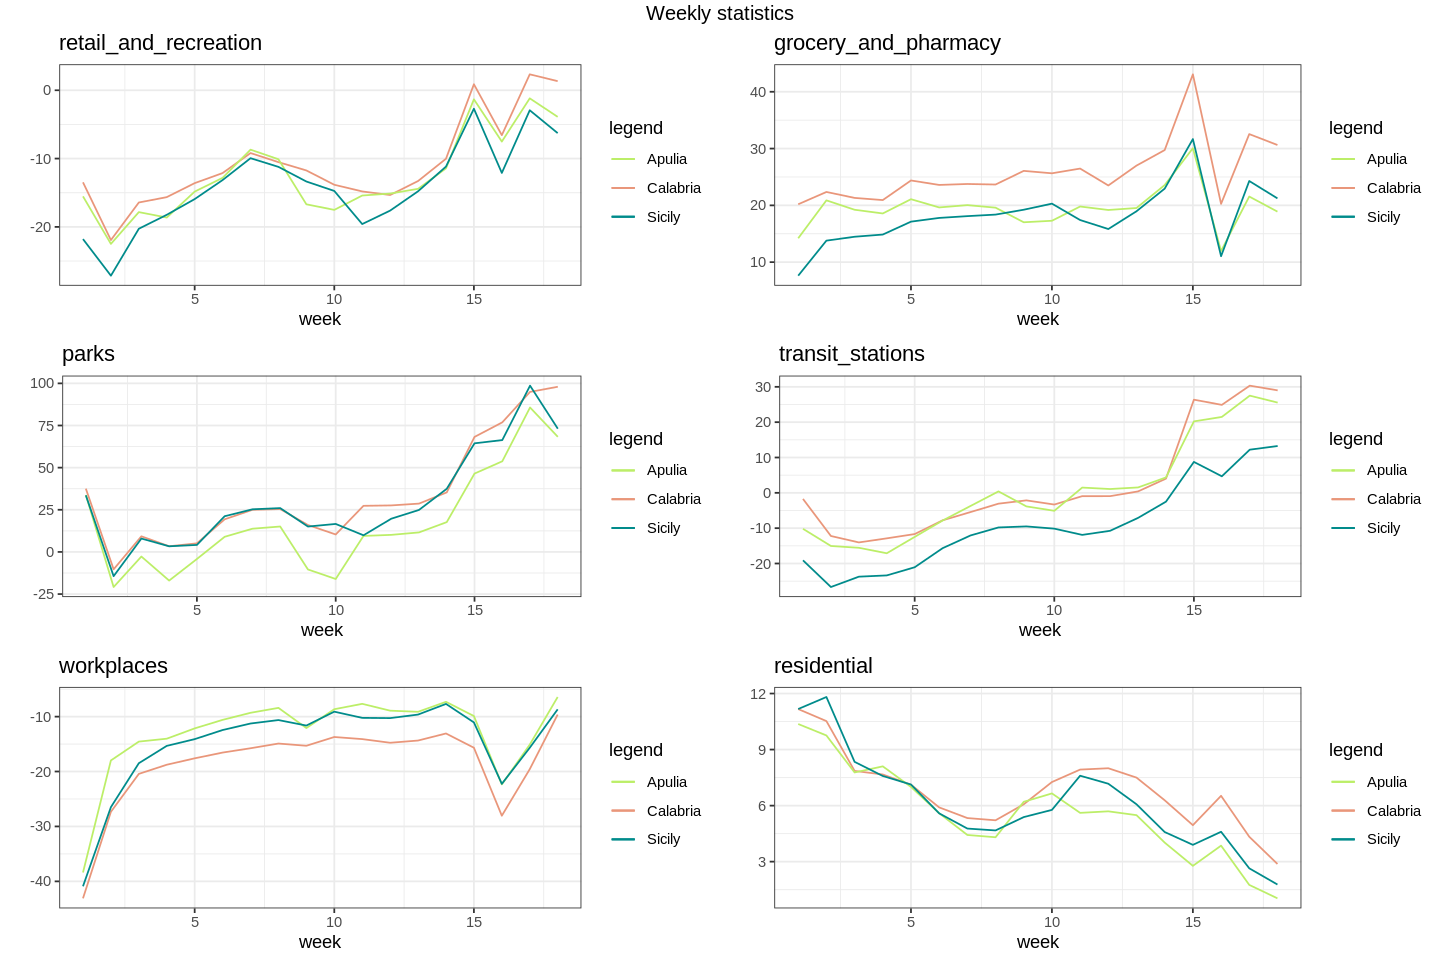

In [9]:
elaborate_plot_reg('Calabria', 'Apulia', 'Sicily', date_type = 'week')

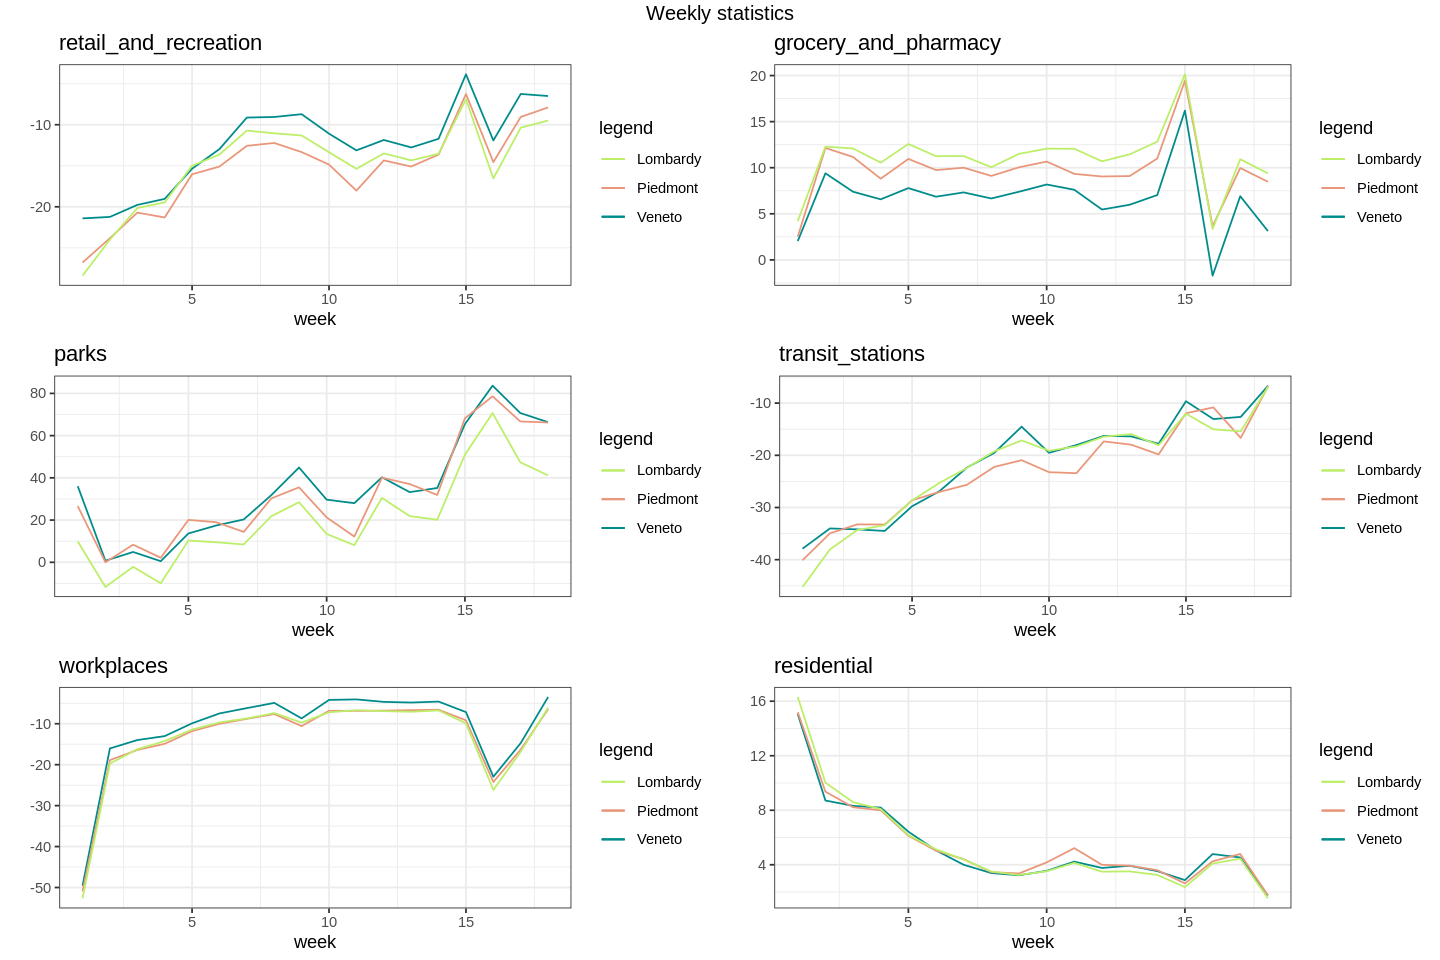

In [10]:
elaborate_plot_reg('Veneto', 'Piedmont', 'Lombardy', date_type = 'week')

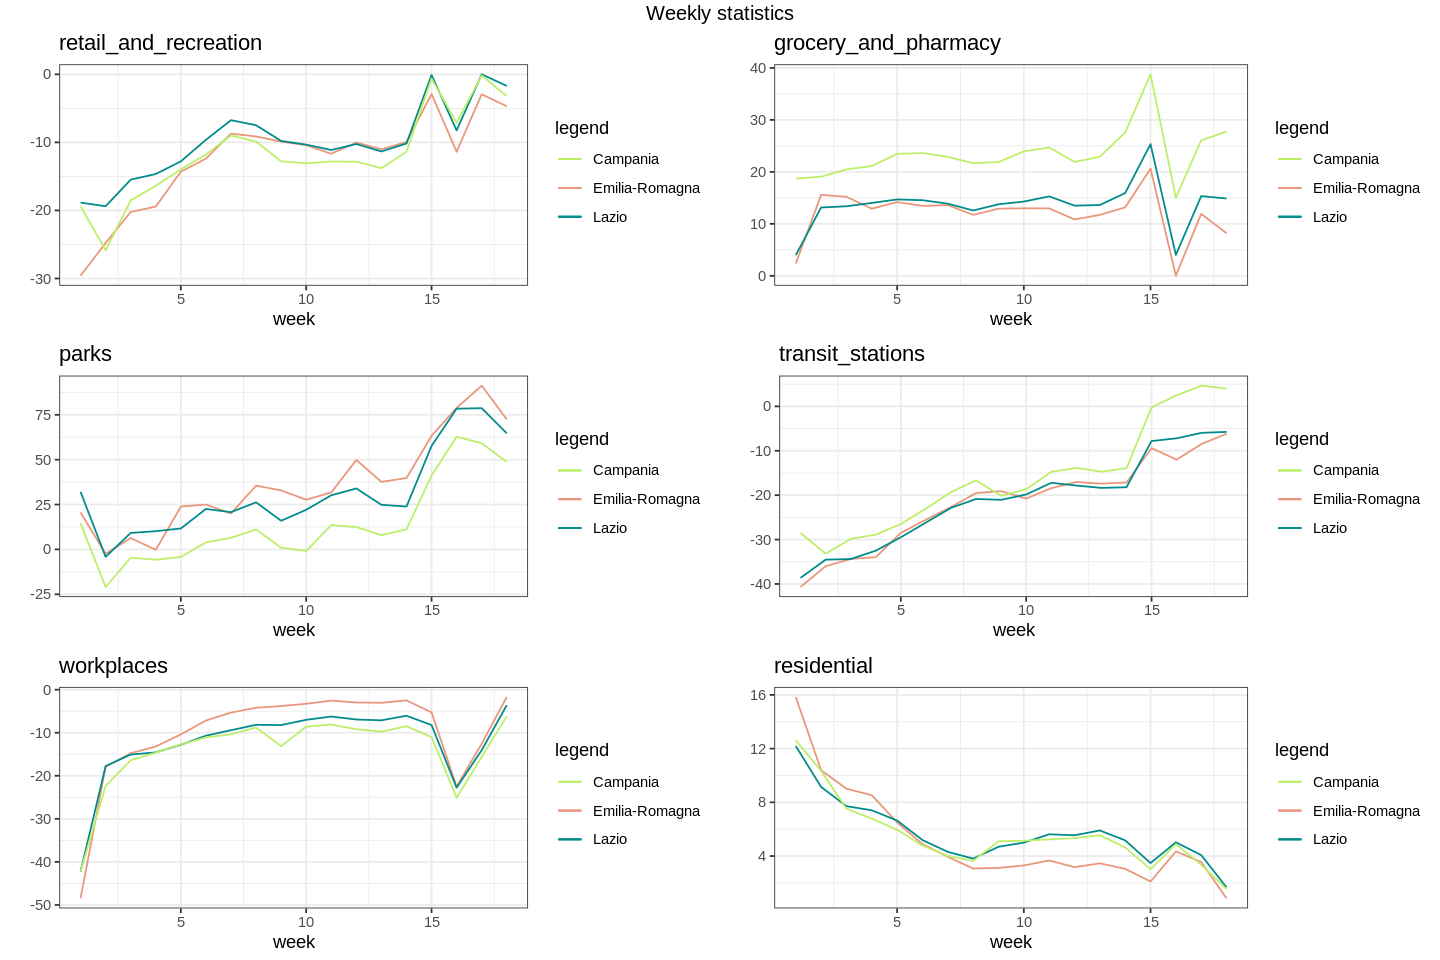

In [11]:
elaborate_plot_reg('Emilia-Romagna', 'Lazio', 'Campania', date_type = 'week')

## Results

It can be observed that both in 2021 and 2022 Italian citizens spent more time than UK citizens in grocery and pharmacy locations: this may be due to the fact that Italy enforced stricter policies than other UE countries to fight COVID.
It can also be seen that Italy curves tend to have a high peak in retail and recreation, parks and transit stations in the summer months. This may be due to the fact that vacations within the country are and were allowed, so people spent more time outside.

As for the region statistics, I chose to compare first three regions in the South, then three in the North and three in Central Italy; then perform a comparison between North, Center and South.
It can be seen however that the trends are all pretty similar, meaning that COVID restrictions and permissions have the same effects in all the Country.

# Exercise 2

one of the first random number generator was proposed by von Neumann, the so-called
middle square algorithm

- write R code to implement this type of generator and, given a fixed digit number input, square it an remove the leading and trailing digits, in order to return a number with the same number of digits as the original number

- Suggestion : after having squared the number, convert it to a list of characters (number <- unlist(strsplit(as.character(x.squared),""))) and, after having removed the head and tail of the list, convert it back to a number (as.numeric(paste(number.after.trimming, collapse="")))

Other than generating the data, I perform a check to see if the data generated are really random, so if the distribution of the data is uniform.

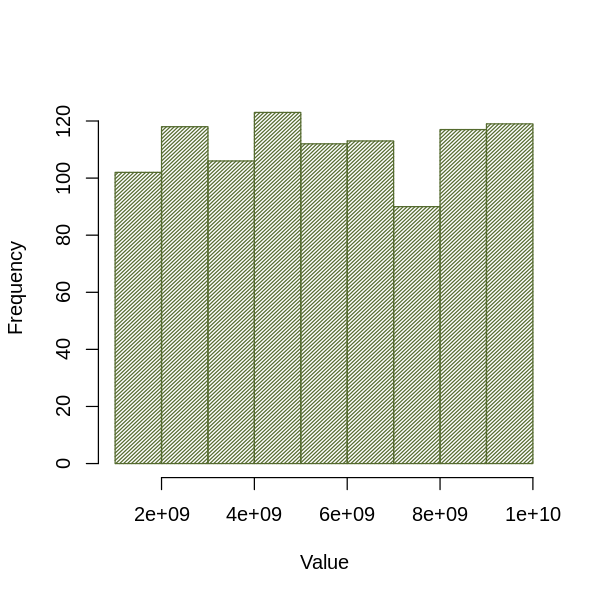

In [12]:
set.seed(43543543)

middle_square <- function(N) {
    vec <- c()
    #Sampling to select sequence of 10 digits (0 was excluded to avoid numbers of 9 bits or less)
    seed <- sample(1:9, 10, replace=T)
    seed <-(as.numeric(paste(seed, collapse="")))
    #seed <- 125547887
    j <- length(unlist(strsplit(as.character(seed),"")))
    
 for (i in 1:N) {
     
     n2 <- seed^2
     
     #get lengths of n, n^2
     n_list <- unlist(strsplit(as.character(seed),""))
     n2_list <- unlist(strsplit(as.character(n2),""))
     length_n <- length(n_list)
     length_n2 <- length(n2_list)
     
     #number of digits to be dropped at the beginning and end of the number
     p <- (length_n2 - length_n)%/%2
     
     #selection of the digits to keep
     new_number <- n2_list[(p + 1):(p + length_n)]
     seed <-(as.numeric(paste(new_number, collapse="")))
     
     #check that the new seed has sufficient length, if not increase it
     l <- length(unlist(strsplit(as.character(seed),"")))
     while(l < j){
            seed <- seed*10
         l <- length(unlist(strsplit(as.character(seed),"")))
     }
     
     vec <- c(vec, seed)
  }

  return(vec)
    
}

options(repr.plot.width = 5, repr.plot.height = 5)
hist(middle_square(1000), col = 'darkolivegreen', density = 30, main = '', xlab = 'Value')

# Exercise 3

A publishing company has recently launched a new journal.

In order to determine how effective it is in reaching its possible audience, a market survey company selects a random sample of people from a possible target audience and interviews them.

Out of 150 interviewed people, 29 have read the last issue of the journal.


#### a) What kind of distribution would you assume for y, the number of people that have seen the last issue of the journal?

I would assume the likelihood to be a binomial distribution, since there are two options, one corresponding to the option that the person read the magazine and the other corresponding to the option of not having read the journal. As for the prior, since there is no prior knowledge about the data, I would assume a uniform distribution. The likelihood then is:

$$ P(r|p, n, M) = \binom{n}{r} p ^r (1-p)^{n-r} $$

And the posterior associated to the uniform prior:

$$ P(p|r, n, M) = \frac{P(r|p, n, M)}{Z} $$

#### b) Assuming a uniform prior, what is the posterior distribution for y?

Assuming a uniform prior, the posterior will be proportional to the likelihood (with a normalization factor which is the evidence), so it will be proportional to a binomial distribution with $n = 150$, $r = 29$.

**NB** I could have used the rule of conjugate priors: the uniform prior corresponds to a $Beta (1,1)$ distribution, so the posterior will be a $Beta (1 + r, 1 + n - r) = Beta (30, 122)$
#### c) Plot both posterior and likelihood ditributions functions

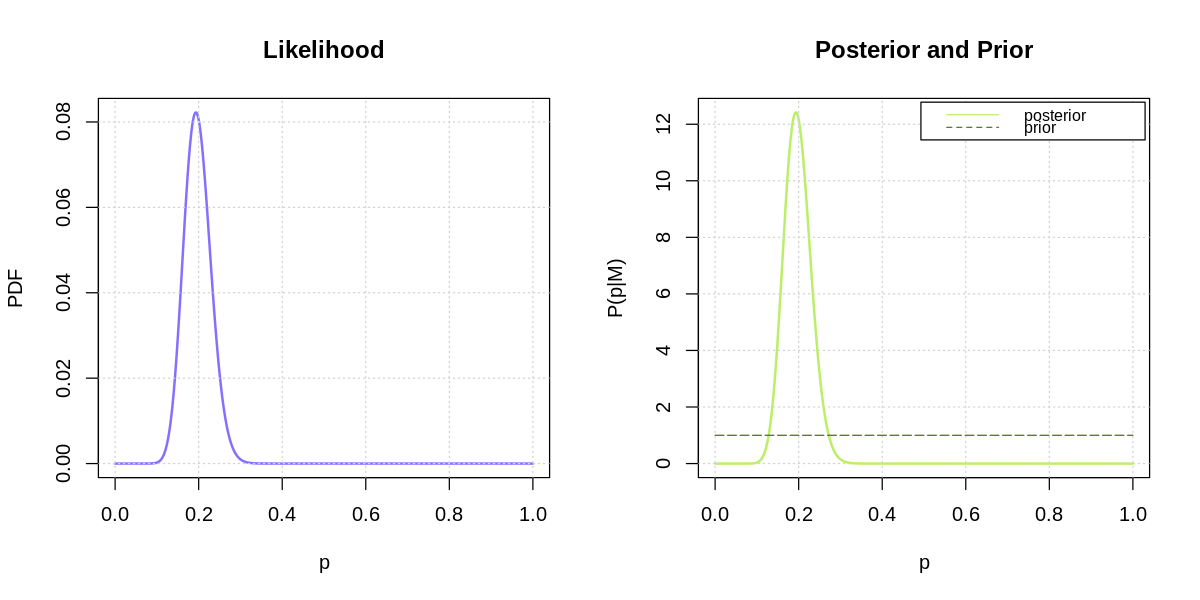

In [13]:
n <- 150
y <- 29
points <- 1000
p <- seq(0, 1, 1/points) #grid of point used for plotting

#Likelihood
likelihood <- dbinom(y, prob = p, size = n)

#Prior
prior <- rep(1, length(p))

#Posterior
Post_notnorm <- function(p){
    dbinom(y, prob = p, size = n)
}
#Normalization
normalization <- integrate(Post_notnorm, lower = 0, upper = 1)$value
posterior <- Post_notnorm(p)/normalization

par(mfrow = c(1,2))
options(repr.plot.width = 10, repr.plot.height = 5)


plot(p, likelihood, type = 'l', col = 'lightslateblue', lwd = 2, ylab = 'PDF', main = 'Likelihood')
grid()


plot(p, posterior, type = 'l', col = 'darkolivegreen2', lwd = 2, ylab = 'P(p|M)', main = 'Posterior and Prior')
grid()
lines(p, prior, lty = 5, col = 'darkolivegreen')
legend('topright', inset = 0.01, legend = c('posterior', 'prior'), col=c('darkolivegreen2', 'darkolivegreen'), lty=1:5, cex=0.8)

# Exercise 4


A coin is flipped n = 30 times with the following outcomes:

T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H

#### a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

I choose different shapes for the beta prior, however after observing the plots I choose among the priors the Beta(10, 10).
It is to remember that a uniform prior corresponds to a Beta(1, 1) prior. To implement just une solution in R using a single function shape, I treated the uniform distribution as a Beta distribution.

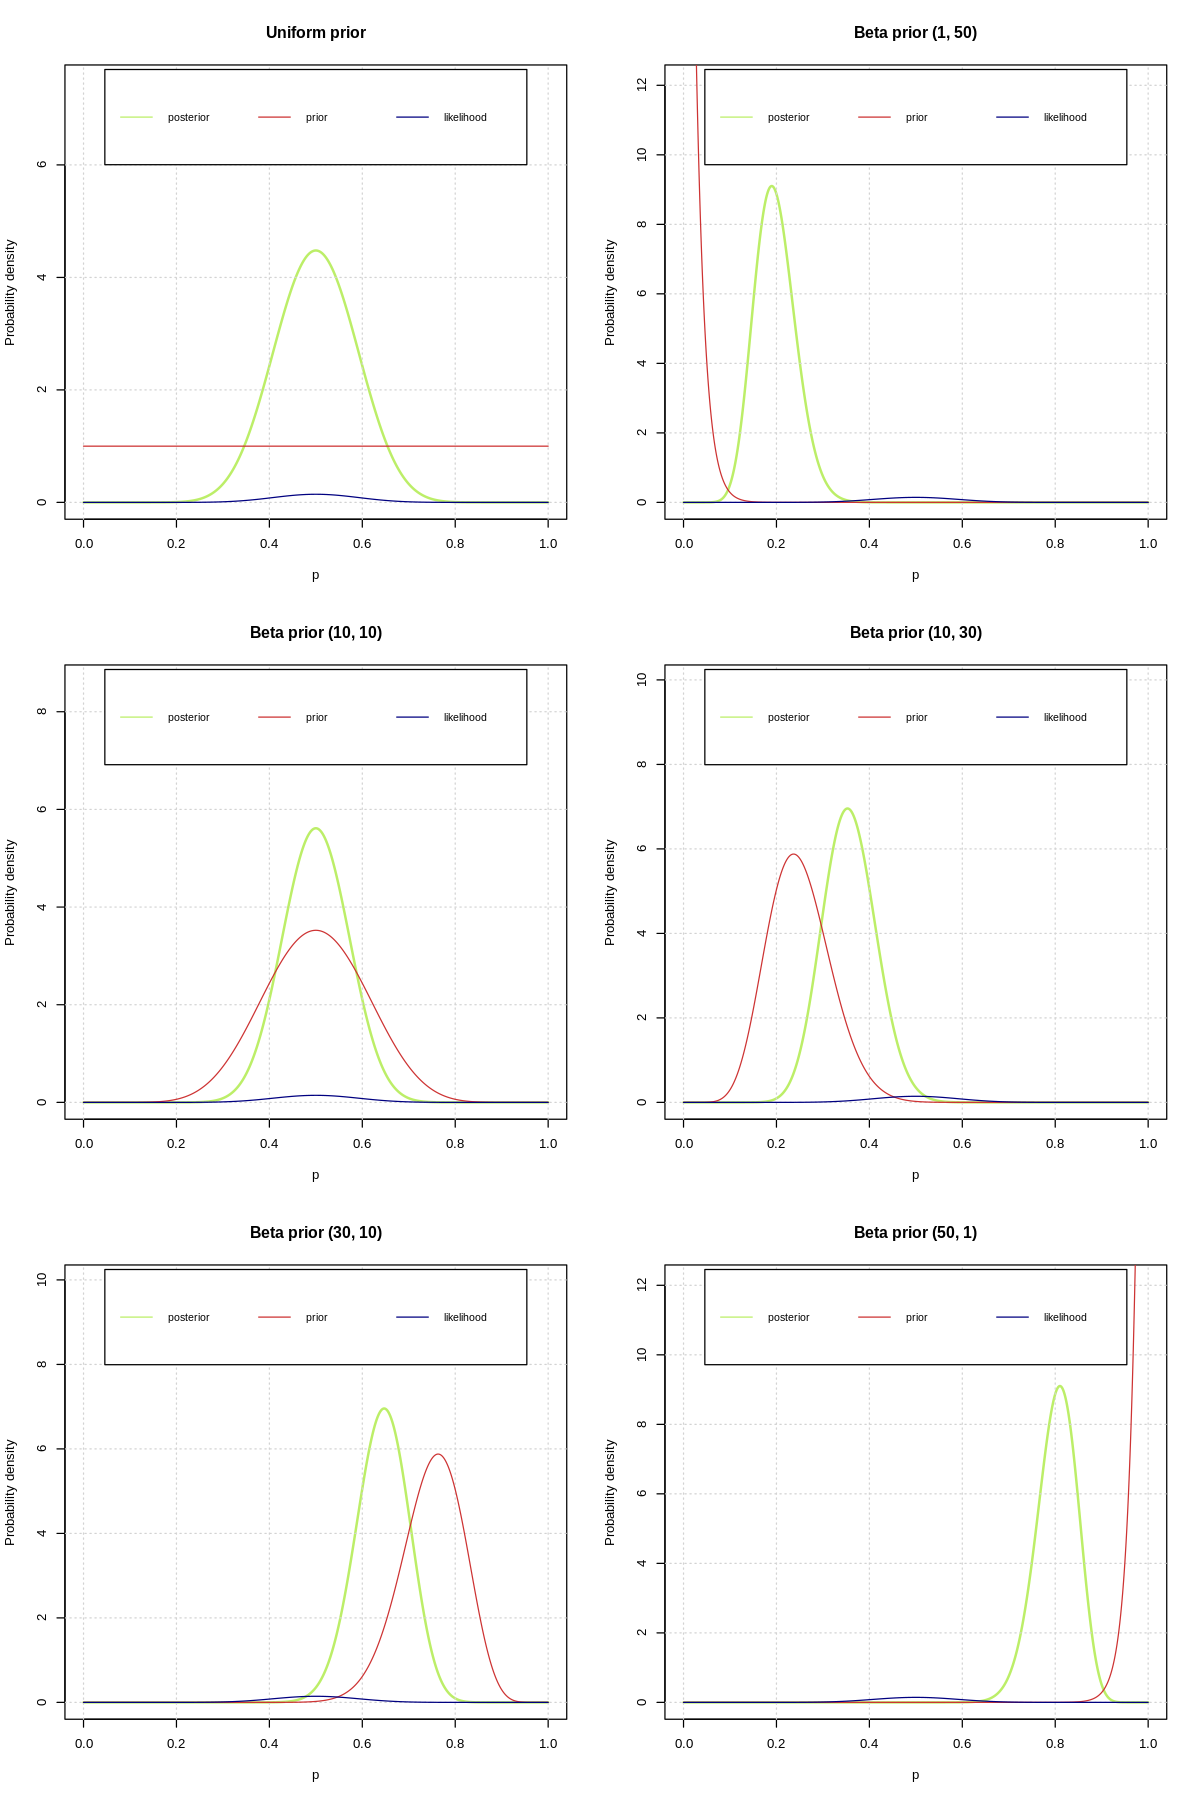

In [14]:
tosses <- c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'H')

numberT <- ifelse(tosses == 'T', 1, 0)
n <- length(numberT)
y <- sum(numberT)
points <- 1000

dp <- 1/points
p  <- seq(0, 1, length = points)

# likelihood
unif_prior <- rep(1, points)
likelihood <- dbinom(y, n, p)

# posterior
unif_post_notnorm  <- likelihood * 1
unif_post <- unif_post_notnorm/(dp*sum(unif_post_notnorm))


plot_beta <- function(a, b){

    likelihood <- dbinom(y, n, p)
    beta_prior <- dbeta(p, a, b)
    beta_post <- dbeta(p, a + y, b + n - y)
    if (a == 1 && b == 1) {title = 'Uniform prior'}
    else {title = paste('Beta prior (', a, ', ', b, ')', sep='')}
    plot(p, beta_post, type = 'l', col = 'darkolivegreen2', lwd = 2,
              ylab = 'Probability density', main = title, ylim = c(0,max(beta_post) + 3))
    grid()
    lines(p, beta_prior, lty = 1, col = 'brown3')
    lines(p, likelihood, lty = 1, col = 'navy')
    legend('top', inset = c(0, 0.01), legend = c('posterior', 'prior', 'likelihood'),
           col=c('darkolivegreen2', 'brown3', 'navy'), lty=1, cex=0.8, box.lty = 1.0, xpd = TRUE, 
       horiz = TRUE)
    
}

alpha <- c(1, 1, 10, 10, 30, 50)
beta <- c(1, 50, 10, 30, 10, 1)

alpha1 <- c(1, 1, 1, 5, 5, 5, 10, 10, 10)
beta1 <- c(1, 5, 10, 1, 5, 10, 1, 5, 10)
par(mfrow = c(3,2))

options(repr.plot.width = 10, repr.plot.height = 15)
invisible(mapply(plot_beta, alpha, beta))

#### b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval

Again, I study the credibility interval for all the beta priors selected.

[1] "Considering a Uniform prior the most probable value for the coin probability p is 0.499 and the 95% Credibility Interval is ( 0.331 0.669 )"         
[2] "Considering a Beta prior ( 1 , 50 ) the most probable value for the coin probability p is 0.19 and the 95% Credibility Interval is ( 0.119 0.29 )"   
[3] "Considering a Beta prior ( 10 , 10 ) the most probable value for the coin probability p is 0.499 and the 95% Credibility Interval is ( 0.363 0.637 )"
[4] "Considering a Beta prior ( 10 , 30 ) the most probable value for the coin probability p is 0.353 and the 95% Credibility Interval is ( 0.25 0.472 )" 
[5] "Considering a Beta prior ( 30 , 10 ) the most probable value for the coin probability p is 0.647 and the 95% Credibility Interval is ( 0.528 0.75 )" 
[6] "Considering a Beta prior ( 50 , 1 ) the most probable value for the coin probability p is 0.81 and the 95% Credibility Interval is ( 0.71 0.881 )"

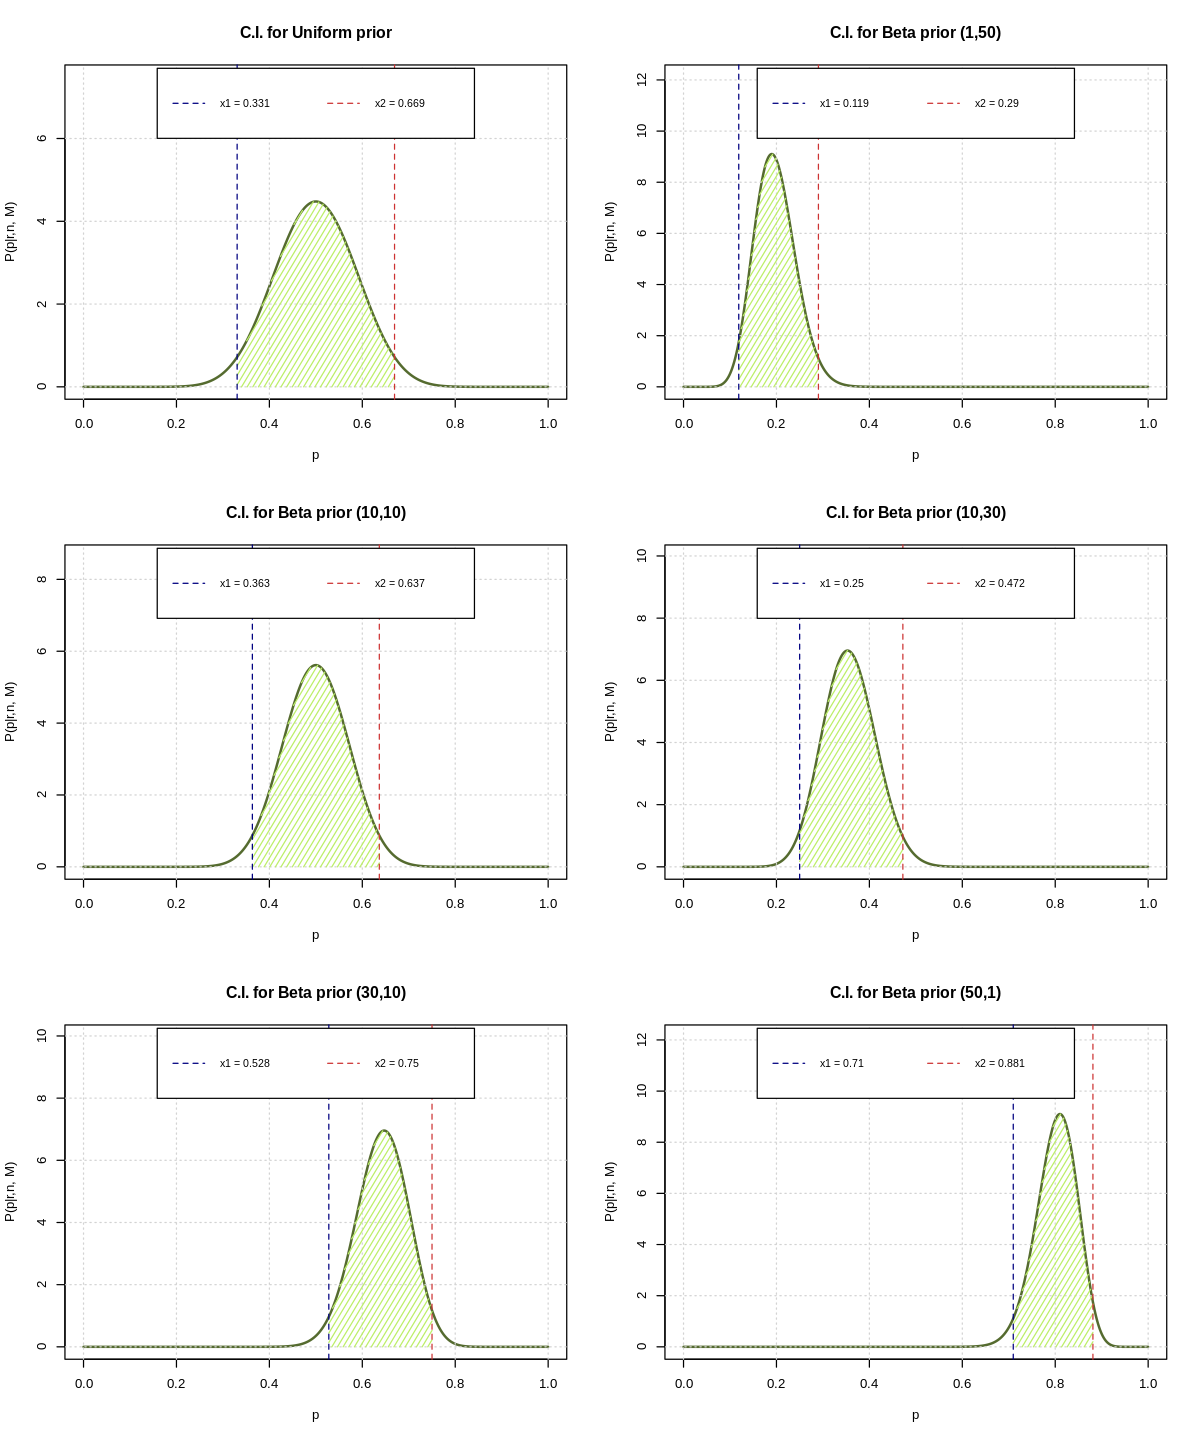

In [15]:
#Set quantile:
q <- 0.025


# prior and likelihood
unif_prior <- rep(1, points)
likelihood <- dbinom(y, n, p)

# posterior
unif_post_notnorm  <- likelihood * 1
unif_post  <- unif_post_notnorm/(dp*sum(unif_post_notnorm))

#Find the thresholds:
# note that the uniform posterior can be found through the rule of conjugate priors
#with alpha = 1 + y, beta = 1 + n - y so post_unif = dbeta(p, 1 + y, 1 + n - y)

find_beta <- function(a, b, q){
    a_post <- a + y
    b_post <- b + n - y
    beta_post <- dbeta(p, a_post, b_post)
    beta_maxp <- p[which.max(beta_post)]
    beta_min <- qbeta(q, a_post, b_post)
    beta_max <- qbeta(1-q, a_post, b_post)
    if (a == 1 && b == 1) {title = 'Uniform prior'}
    else {title = paste('Beta prior (', a, ',', b, ')')}
    paste('Considering a', title ,'the most probable value for the coin probability p is',
          round(beta_maxp, 3), 'and the 95% Credibility Interval is (', round(beta_min, 3), round(beta_max, 3), ')')

}

alpha <- c(1, 1, 10, 10, 30, 50)
beta <- c(1, 50, 10, 30, 10, 1)

mapply(find_beta, alpha, beta, 0.025)

plot_beta_prior <- function(a, b){

    a_post <- a + y
    b_post <- b + n - y
    beta_post <- dbeta(p, a_post, b_post)
    beta_min <- qbeta(q, a_post, b_post)
    beta_max <- qbeta(1-q, a_post, b_post)
    if (a == 1 && b == 1) {title = 'C.I. for Uniform prior'}
    else {title = paste('C.I. for Beta prior (', a, ',', b, ')', sep='')}
    plot(p, beta_post, type = 'l', col = 'darkolivegreen', lwd = 2, ylab = 'P(p|r,n, M)',
     main = title,  ylim = c(0,max(beta_post) + 3))
    grid()
    beta_ci <- seq(beta_min, beta_max, len = 200)
    polygon(c(beta_ci ,beta_max, beta_min), c(dbeta(beta_ci, a_post, b_post), 0, 0), col='darkolivegreen2', density = 50, bor=NA)
    abline(v = beta_min, lty='dashed', col = 'navy')
    par("usr")
    abline(v = beta_max, lty = 'dashed', col = 'brown3')
        legend('top', inset = c(0, 0.01), legend = c(paste('x1 = ', round(beta_min, 3), sep=''), paste('x2 = ', round(beta_max, 3), sep='')),
               col=c('navy', 'brown3'), lty=2, cex=0.8, box.lty = 1.0, xpd = TRUE, horiz = TRUE)
}

par(mfrow = c(3,2))
options(repr.plot.width = 10, repr.plot.height = 12)

invisible(mapply(plot_beta_prior, alpha, beta))

#### c) Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).

Now I consider only the flat prior and the Beta(10, 10).

In [16]:
tosses <- c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'H')
points <- 1000

dp <- 1/points
p  <- seq(0, 1, length = points)

# likelihood
unif_prior <- rep(1, points)

#Set quantile:
q <- 0.025


computations <- function(tentatives, a, b, flag){
    coins <- ifelse(tentatives == 'T', 1, 0)
    
    #Initialising vectors
    beta_maxp <- c()
    beta_max <- c()
    beta_min <- c()
    
    #This vector is needed to record the initial prior used
    Prior <- rep(paste('Prior: shape1 =', toString(a), 'shape2 =',toString(b)), length(coins))
    
    a_post <- a
    b_post <- b
    
    n <- 1
    
    for (r in coins){
    
    #Find parameters of new posterior
    a_post <- a_post + r
    b_post <- b_post + n - r
    
    beta_post <- dbeta(p, a_post, b_post)
    beta_maxp <- c(beta_maxp, p[which.max(beta_post)])

    #Calculate new CI
    #beta_maxp <- c(beta_maxp, (a_post - 1)/(a_post + b_post - 2))    
    beta_min <- c(beta_min, qbeta(q, a_post, b_post))
    beta_max <- c(beta_max, qbeta(1 - q, a_post, b_post))
    }
    
    x <- seq(length(coins))
    #final dataframe
    df <- data.frame(x, coins, beta_maxp, beta_min, beta_max, Prior)
    ab <- rbind(a_post, b_post)
    paste(ab)
    
    if(flag) return(df)
    else return(ab)
}

In [17]:
data_unif <- computations(tosses, 1, 1, TRUE)

In [18]:
head(data_unif)

tail(data_unif, 1)

x,coins,beta_maxp,beta_min,beta_max,Prior
1,1,1.0000000,0.1581139,0.9874209,Prior: shape1 = 1 shape2 = 1
2,1,1.0000000,0.2924018,0.9915962,Prior: shape1 = 1 shape2 = 1
3,1,1.0000000,0.3976354,0.9936905,Prior: shape1 = 1 shape2 = 1
4,1,1.0000000,0.4781762,0.9949492,Prior: shape1 = 1 shape2 = 1
5,1,1.0000000,0.5407419,0.9957893,Prior: shape1 = 1 shape2 = 1
6,0,0.8328328,0.4212768,0.9633074,Prior: shape1 = 1 shape2 = 1


,x,coins,beta_maxp,beta_min,beta_max,Prior
30,30,0,0.4994995,0.330606,0.669394,Prior: shape1 = 1 shape2 = 1


In [19]:
data_beta <- computations(tosses, 10, 10, TRUE)

head(data_beta)

tail(data_beta, 1)

x,coins,beta_maxp,beta_min,beta_max,Prior
1,1,0.5265265,0.3152781,0.7280422,Prior: shape1 = 10 shape2 = 10
2,1,0.5495495,0.3402063,0.7428694,Prior: shape1 = 10 shape2 = 10
3,1,0.5715716,0.3635470,0.7561381,Prior: shape1 = 10 shape2 = 10
4,1,0.5905906,0.3854190,0.7680858,Prior: shape1 = 10 shape2 = 10
5,1,0.6086086,0.4059364,0.7789031,Prior: shape1 = 10 shape2 = 10
6,0,0.5835836,0.3866535,0.7559763,Prior: shape1 = 10 shape2 = 10


,x,coins,beta_maxp,beta_min,beta_max,Prior
30,30,0,0.4994995,0.3633783,0.6366217,Prior: shape1 = 10 shape2 = 10


In [20]:
data <- rbind(data_unif, data_beta)

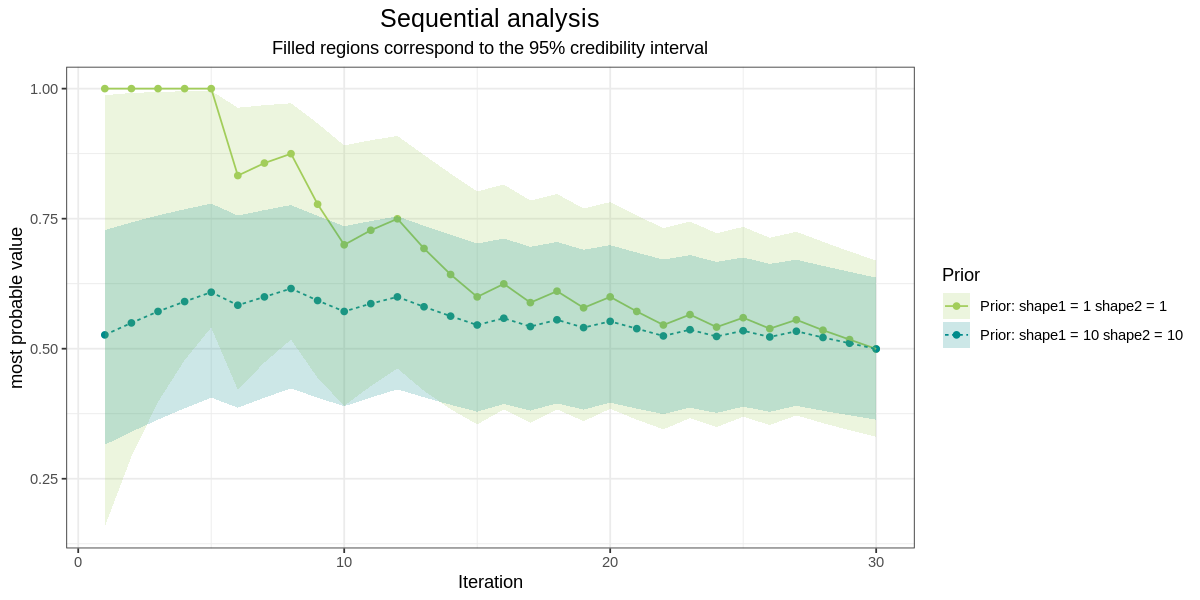

In [25]:
options(repr.plot.width = 10, repr.plot.height = 5)
plot <- ggplot(data=data, aes(x=x, y=beta_maxp, ymax=beta_max, ymin=beta_min, fill = Prior, color = Prior, lty = Prior)) +   
     theme_bw()+
     geom_point() +
     geom_line(lwd = 0.5) +
     geom_ribbon(alpha = 0.2, colour=NA) +
     ggtitle('Sequential analysis') +
     scale_color_manual(values = c('darkolivegreen3','cyan4')) +
     scale_fill_manual(values = c('darkolivegreen3','cyan4')) +
     labs(subtitle = 'Filled regions correspond to the 95% credibility interval') +
     theme(plot.title = element_text(size=15, hjust = 0.5), 
           plot.subtitle = element_text(hjust=0.5))  +
        xlab('Iteration') + ylab('most probable value')

plot

#### d) Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole)?

No, as expected I get the same results. The posterior shown in the plots, obtained as the last step of the sequential analysis is the same that was obtained previously in points a) and b), without performing a sequential analysis.

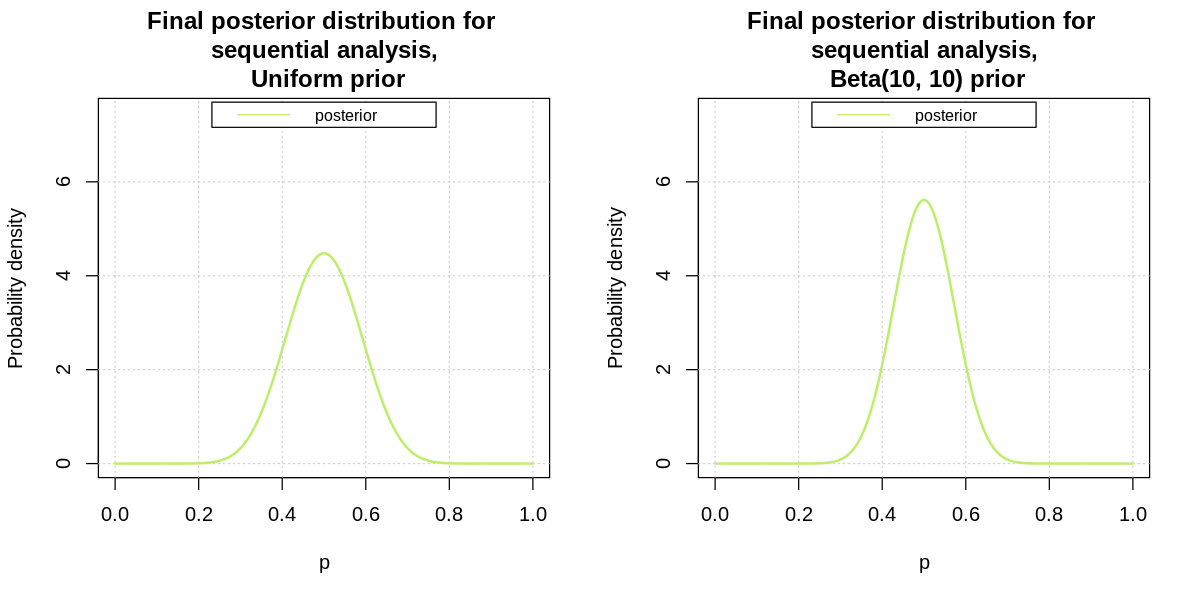

In [22]:
#Final distributions for sequential analysis (final alpha and beta updates)
ab <- computations(tosses, 1, 1, FALSE)
seq_post_unif <- dbeta(p,ab[1],ab[2])

ab <- computations(tosses, 10, 10, FALSE)
seq_post_beta <- dbeta(p,ab[1],ab[2])

#Plots
ylim=c(0,6)
par(mfrow=c(1,2))
options(repr.plot.width = 10, repr.plot.height = 5)

plot(p, seq_post_unif, type = 'l', col = 'darkolivegreen2', lwd = 2,
              ylab = 'Probability density', main = 'Final posterior distribution for \n sequential analysis, \n Uniform prior', ylim = c(0,max(seq_post_unif) + 3))
grid()
legend('top', inset = c(0, 0.01), legend = c('posterior'),
           col=c('darkolivegreen2'), lty=1, cex=0.8, box.lty = 1.0, xpd = TRUE, horiz = TRUE)

plot(p, seq_post_beta, type = 'l', col = 'darkolivegreen2', lwd = 2,
              ylab = 'Probability density', main = 'Final posterior distribution for \n sequential analysis, \n Beta(10, 10) prior', ylim = c(0,max(seq_post_unif) + 3))
grid()
legend('top', inset = c(0, 0.01), legend = c('posterior'),
           col=c('darkolivegreen2'), lty=1, cex=0.8, box.lty = 1.0, xpd = TRUE, horiz = TRUE)